In [10]:
# ✅ Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import joblib

In [11]:
# ✅ Step 2: Load the dataset
# The dataset often uses ' ?' for missing values, so we specify that during loading.
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\adult 3.csv", na_values=' ?')

In [12]:
# ✅ Step 3: Clean the dataset
df = df.dropna()  # Remove rows with missing values

In [14]:
# ✅ Step 4: Keep useful columns and create the 'experience' feature
useful_columns = ['age', 'education', 'occupation', 'hours-per-week', 'income']
df = df[useful_columns].copy()
df['experience'] = (df['age'] - 18).clip(lower=0) # Clip experience at a minimum of 0

In [15]:
df

,age,education,occupation,hours-per-week,income,experience
0,25,11th,Machine-op-inspct,40,<=50K,7
1,38,HS-grad,Farming-fishing,50,<=50K,20
2,28,Assoc-acdm,Protective-serv,40,>50K,10
3,44,Some-college,Machine-op-inspct,40,>50K,26
4,18,Some-college,?,30,<=50K,0
...,...,...,...,...,...,...
48837,27,Assoc-acdm,Tech-support,38,<=50K,9
48838,40,HS-grad,Machine-op-inspct,40,>50K,22
48839,58,HS-grad,Adm-clerical,40,<=50K,40
48840,22,HS-grad,Adm-clerical,20,<=50K,4


In [16]:
# ✅ Step 5: Define features and target
X = df.drop('income', axis=1)
y = (df['income'] == '>50K').astype(int)  # Convert target to binary

In [18]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [19]:
# Define the values you want to remove
values_to_remove = ['5th-6th', '1st-4th', 'Preschool']

# Filter out rows with these values in the 'education' column
df = df[~df['education'].isin(values_to_remove)]

In [20]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64

In [21]:
df['occupation'].value_counts()

occupation
Prof-specialty       6165
Exec-managerial      6073
Craft-repair         6007
Adm-clerical         5594
Sales                5477
Other-service        4748
Machine-op-inspct    2879
?                    2740
Transport-moving     2303
Handlers-cleaners    1982
Tech-support         1445
Farming-fishing      1388
Protective-serv       981
Priv-house-serv       206
Armed-Forces           15
Name: count, dtype: int64

In [23]:


df.replace('?', 'Others', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22044\2108945670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('?', 'Others', inplace=True)


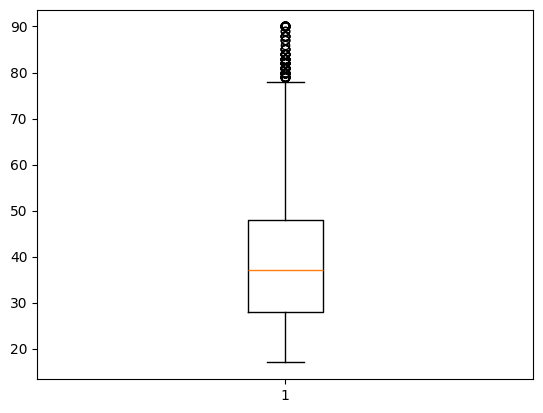

In [38]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(df['age'])
plt.show()

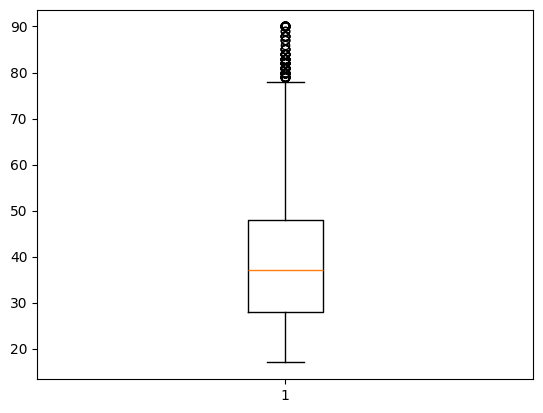

In [40]:
plt.boxplot(df['age'])
plt.show()

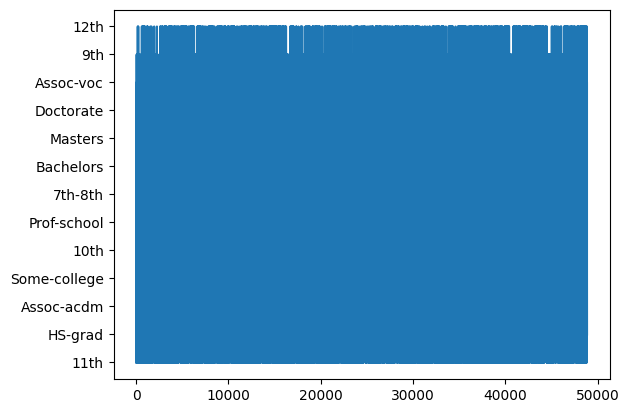

In [45]:
plt.plot(df['education'])
plt.show()

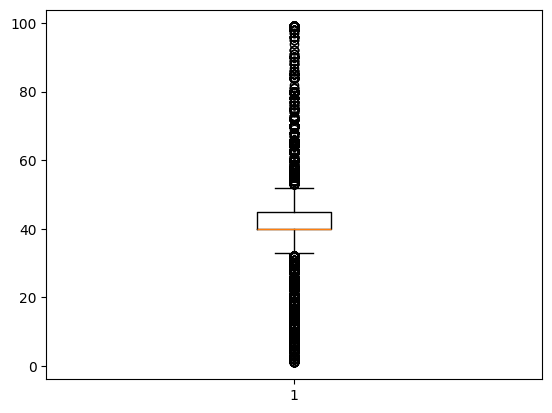

In [47]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [24]:
df

,age,education,occupation,hours-per-week,income,experience
0,25,11th,Machine-op-inspct,40,<=50K,7
1,38,HS-grad,Farming-fishing,50,<=50K,20
2,28,Assoc-acdm,Protective-serv,40,>50K,10
3,44,Some-college,Machine-op-inspct,40,>50K,26
4,18,Some-college,Others,30,<=50K,0
...,...,...,...,...,...,...
48837,27,Assoc-acdm,Tech-support,38,<=50K,9
48838,40,HS-grad,Machine-op-inspct,40,>50K,22
48839,58,HS-grad,Adm-clerical,40,<=50K,40
48840,22,HS-grad,Adm-clerical,20,<=50K,4


In [25]:
# ✅ Step 5: Add "experience" feature
df['experience'] = df['age'] - 18
df['experience'] = df['experience'].clip(lower=0, upper=40)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22044\671812441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience'] = df['age'] - 18
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22044\671812441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience'] = df['experience'].clip(lower=0, upper=40)


In [26]:
df

,age,education,occupation,hours-per-week,income,experience
0,25,11th,Machine-op-inspct,40,<=50K,7
1,38,HS-grad,Farming-fishing,50,<=50K,20
2,28,Assoc-acdm,Protective-serv,40,>50K,10
3,44,Some-college,Machine-op-inspct,40,>50K,26
4,18,Some-college,Others,30,<=50K,0
...,...,...,...,...,...,...
48837,27,Assoc-acdm,Tech-support,38,<=50K,9
48838,40,HS-grad,Machine-op-inspct,40,>50K,22
48839,58,HS-grad,Adm-clerical,40,<=50K,40
48840,22,HS-grad,Adm-clerical,20,<=50K,4


In [27]:
# ✅ Step 5: Define features and target
X = df.drop('income', axis=1)
y = (df['income'] == '>50K').astype(int)  # Convert target to binary

In [28]:
# ✅ Step 6: Define preprocessing for numerical and categorical features
# We separate columns by their type to apply different transformations.
numerical_features = ['age', 'hours-per-week', 'experience']
categorical_features = ['education', 'occupation']


In [29]:
# Create a preprocessing pipeline with ColumnTransformer
# Numerical features will be scaled.
# Categorical features will be one-hot encoded.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [30]:
# ✅ Step 7: Define the model pipeline
# This pipeline chains the preprocessor and the classifier.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [31]:
# ✅ Step 8: Define the parameter grid for GridSearchCV
# These are the hyperparameters we want to tune.
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 4]
}

In [32]:
# ✅ Step 9: Train the model using GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# GridSearchCV will test all parameter combinations using 5-fold cross-validation.
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__learning_rate': [0.05, 0.1], 'classifier__max_depth': [3, 4], 'classifier__n_estimators': [100, 200]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [34]:
# ✅ Step 10: Evaluate the best model
print(f"Best parameters found: {grid_search.best_params_}")
print("\n--- Test Set Evaluation ---")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}

--- Test Set Evaluation ---
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7264
           1       0.65      0.40      0.49      2337

    accuracy                           0.80      9601
   macro avg       0.74      0.66      0.68      9601
weighted avg       0.78      0.80      0.78      9601



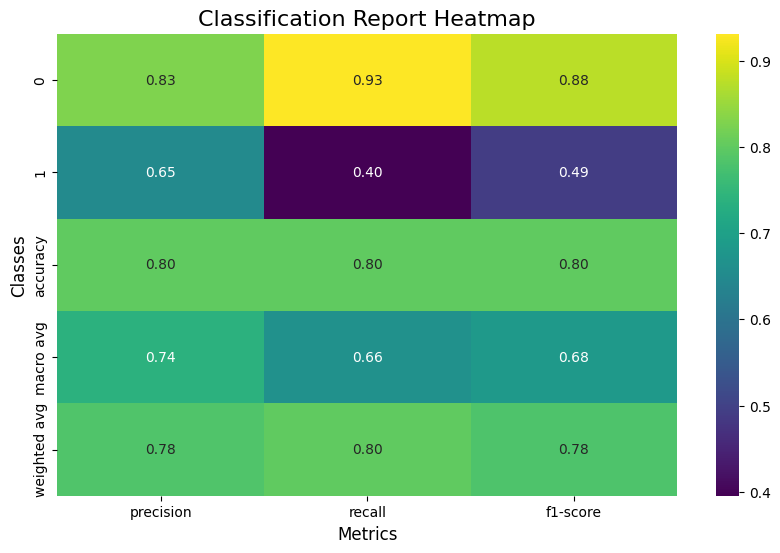

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# This assumes 'y_test' and 'y_pred' are available from the previous cell

# ✅ Step 1: Generate the report as a dictionary for easy processing
# Set output_dict=True to get the report in a machine-readable format.
report_dict = classification_report(y_test, y_pred, output_dict=True)

# ✅ Step 2: Convert the dictionary to a pandas DataFrame
# We transpose it (.T) to have classes as rows and metrics as columns.
report_df = pd.DataFrame(report_dict).T

# Remove the 'support' column as it's not a metric we want to plot on the same scale
report_df = report_df.drop('support', axis=1)

# ✅ Step 3: Plot the DataFrame as a heatmap
plt.figure(figsize=(10, 6)) # Set the figure size
sns.heatmap(
    report_df, 
    annot=True,     # Display the metric values in each cell
    cmap='viridis', # Choose a vibrant color map
    fmt='.2f'       # Format the numbers to two decimal places
)

# Add titles and labels for clarity
plt.title('Classification Report Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Classes', fontsize=12)
plt.show()

In [36]:
# ✅ Step 11: Save the best model (the entire pipeline)
# The saved pipeline includes the preprocessor and the tuned classifier.
joblib.dump(best_model, 'best_salary_model_pipeline.pkl')
print("\n✅ Best model pipeline saved successfully!")


✅ Best model pipeline saved successfully!
